## Importing

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")

In [23]:
FILE_PATH = "./data.csv"
df = pd.read_csv(FILE_PATH)

df.head()

Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

In [33]:
df.iloc[0].Sentence

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [24]:
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

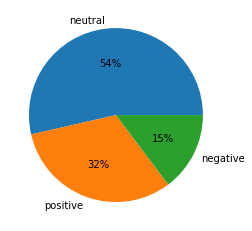

In [25]:
pie_data = df.Sentiment.value_counts()

plt.pie(pie_data, labels=pie_data.index, autopct='%.0f%%')
plt.show()

## Map words to Pandas Series

In [126]:
words = {}
def map_words(sentence):
    doc = nlp(sentence.lower())
    for token in doc:
        if token.is_alpha == False:
            continue
        if str(token.lemma_) in words.keys():
            words[str(token.lemma_)] += 1
        else:
            words[str(token.lemma_)] = 1
df.loc[df.Sentiment == "positive"].Sentence.apply(map_words)

word_counts = pd.Series(words.values(), index=words.keys())

In [127]:
word_counts.sort_values(ascending=False).iloc[0:20]

the        1450
to          986
in          937
of          805
and         648
a           564
be          538
for         453
eur         437
from        381
have        269
on          262
mn          239
year        236
company     232
its         232
sale        229
say         223
with        220
profit      209
dtype: int64